In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import datetime
import os
from tueplots import bundles
from tueplots.constants.color import rgb
import sklearn as sk
from sklearn.decomposition import PCA
import seaborn as sns
import dload
import geopandas as gpd
from shapely.geometry import Point, Polygon

#plt.rcParams.update(bundles.beamer_moml())
#plt.rcParams.update({"figure.dpi": 200})


In [4]:
accidents = pd.read_csv('FARS2021NationalCSV/accident.csv',encoding='WINDOWS-1252',low_memory=False)
drugs = pd.read_csv('FARS2021NationalCSV/drugs.csv',encoding='WINDOWS-1252',low_memory=False)
person = pd.read_csv('FARS2021NationalCSV/person.csv',encoding='WINDOWS-1252',low_memory=False)

In [35]:
person['LATTIUDE']

KeyError: 'LATTIUDE'

In [5]:
col_labels = list(accidents.columns.values)
labels_to_keep = ['ST_CASE','STATE','STATENAME','COUNTY','COUNTYNAME','CITY','CITYNAME','MONTH','DAY','DAYNAME','DAY_WEEK','HOUR','LATITUDE','LONGITUD','WEATHER','LGT_COND' ]
drop_labels = [x for x in col_labels if x not in labels_to_keep]


In [6]:
accidents = accidents.drop(drop_labels,axis=1)


In [7]:
accidents

,STATE,STATENAME,ST_CASE,COUNTY,COUNTYNAME,CITY,CITYNAME,MONTH,DAY,DAYNAME,DAY_WEEK,HOUR,LATITUDE,LONGITUD,LGT_COND,WEATHER
0,1,Alabama,10001,115,ST. CLAIR (115),0,NOT APPLICABLE,2,12,12,6,22,33.601642,-86.312383,2,2
1,1,Alabama,10002,73,JEFFERSON (73),0,NOT APPLICABLE,2,11,11,5,18,33.541361,-86.643744,2,2
2,1,Alabama,10003,73,JEFFERSON (73),0,NOT APPLICABLE,2,7,7,1,0,33.419797,-86.752572,2,2
3,1,Alabama,10004,117,SHELBY (117),0,NOT APPLICABLE,2,3,3,4,16,33.360894,-86.777139,1,1
4,1,Alabama,10005,73,JEFFERSON (73),0,NOT APPLICABLE,1,30,30,7,22,33.815208,-86.825342,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503,56,Wyoming,560100,19,JOHNSON (19),0,NOT APPLICABLE,11,27,27,7,9,44.183594,-106.622031,1,1
39504,56,Wyoming,560101,3,BIG HORN (3),0,NOT APPLICABLE,12,14,14,3,18,44.257797,-107.856219,2,1
39505,56,Wyoming,560102,37,SWEETWATER (37),0,NOT APPLICABLE,12,15,15,4,10,41.560719,-109.536278,1,1
39506,56,Wyoming,560103,21,LARAMIE (21),100,CHEYENNE,12,19,19,1,17,41.138878,-104.766653,2,1


In [8]:
person

,STATE,STATENAME,ST_CASE,VEH_NO,PER_NO,VE_FORMS,COUNTY,MONTH,MONTHNAME,DAY,...,EMER_USE,EMER_USENAME,ROLLOVER,ROLLOVERNAME,IMPACT1,IMPACT1NAME,FIRE_EXP,FIRE_EXPNAME,MAK_MOD,MAK_MODNAME
0,1,Alabama,10001,1,1,2,115,2,February,12,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,2407.0,Jeep / Kaiser-Jeep / Willys- Jeep Patriot
1,1,Alabama,10001,1,2,2,115,2,February,12,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,2407.0,Jeep / Kaiser-Jeep / Willys- Jeep Patriot
2,1,Alabama,10001,2,1,2,115,2,February,12,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,51404.0,Volvo XC60 (For 2019 on. For model years 2008...
3,1,Alabama,10002,1,1,1,73,2,February,11,...,0.0,Not Applicable,0.0,No Rollover,11.0,11 Clock Point,0.0,No or Not Reported,59031.0,Lexus ES-250/300/300h/330/ 350
4,1,Alabama,10002,1,2,1,73,2,February,11,...,0.0,Not Applicable,0.0,No Rollover,11.0,11 Clock Point,0.0,No or Not Reported,59031.0,Lexus ES-250/300/300h/330/ 350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96742,56,Wyoming,560102,1,1,1,37,12,December,15,...,0.0,Not Applicable,1.0,"Rollover, Tripped by Object/Vehicle",0.0,Non-Collision,0.0,No or Not Reported,82881.0,Freightliner Medium/Heavy - CBE
96743,56,Wyoming,560103,0,1,1,21,12,December,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96744,56,Wyoming,560103,1,1,1,21,12,December,19,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,34401.0,"BMW X5 (For 2000-16. For 2017 on, see model 4..."
96745,56,Wyoming,560104,1,1,2,23,12,December,20,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,48034.0,Subaru Legacy/Outback(prior to 2003 only; see ...


In [9]:
per_col_labels = list(person.columns.values)
per_labels_to_keep = ['PER_TYP','ST_CASE','AGE','ALC_RES','DRUGS']
per_drop_labels = [x for x in per_col_labels if x not in per_labels_to_keep]
perN = person.drop(per_drop_labels, axis=1)

In [10]:
perN = perN.loc[perN['PER_TYP']==1] ##Only drivers

In [11]:
perN

,ST_CASE,AGE,PER_TYP,ALC_RES,DRUGS
0,10001,31,1,0,8
2,10001,25,1,0,0
3,10002,34,1,996,0
6,10003,18,1,996,9
7,10004,32,1,0,9
...,...,...,...,...,...
96741,560101,41,1,995,0
96742,560102,61,1,0,0
96744,560103,32,1,0,0
96745,560104,58,1,0,1


In [9]:
ages = perN['AGE'].to_list()
alc = perN['ALC_RES'].to_list()

In [10]:
type(ages)
type(alc)


list

In [11]:
while(max(ages) == 998):
    i = ages.index(998)
    ages.pop(i)
    alc.pop(i)

In [12]:
alc[0]

0

In [13]:
#plt.scatter(ages,alc)

In [14]:
### Prepare array the historgram 
histWhole = [0 for k in range(100)]
histDrunk = [0 for k in range(100)]
for i in range(100):
    for j in range(len(ages)):
        if ages[j] == i: 
            histWhole[i] = histWhole[i] + 1
            if alc[j] != 0:
                histDrunk[i] = histDrunk[i] + 1
                
                



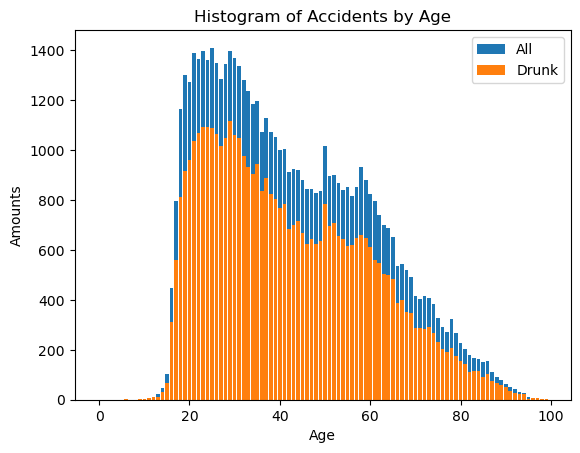

In [15]:
### Plot the histograms
plt.title('Histogram of Accidents by Age')
plt.xlabel('Age')
plt.ylabel('Amounts')
plt.bar([i for i in range(100)],histWhole,label='All')
plt.bar([i for i in range(100)],histDrunk,label='Drunk')
plt.legend()

In [16]:
### Make into age group
bins = [i for i in range(17)]
res = [0 for i in range(17)]
for x in ages:
    if x >= 85: res[-1] = res[-1] +1
    else:
        x = x - (x % 5)
        b = int(x / 5)
        res[b] = res[b] +1
tot = len(ages)
procent_age = [i*100 / tot for i in res]

In [17]:
12 % 5

2

In [18]:
us_cens = pd.read_csv('US_CENSUS/2021agesex_table1.csv',encoding='WINDOWS-1252',low_memory=False)

In [19]:
ag = us_cens['Unnamed: 2'].tolist()

In [20]:
ag[6]


'5.9'

In [21]:
x = [i for i in range(17)]
y = [float(ag[i+6]) for i in range(17)]

Text(0.5, 0, 'Age Group, blocks of 5 years')

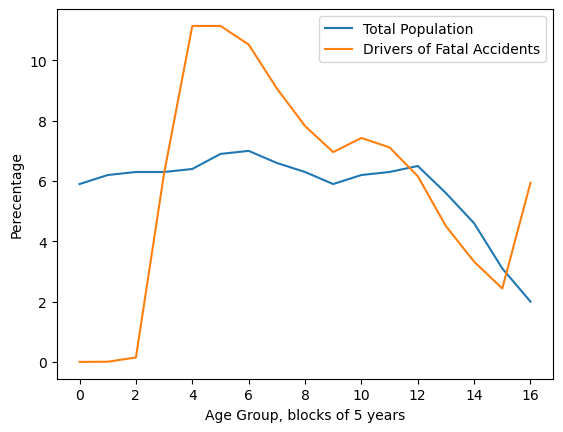

In [22]:
plt.plot(x,y, label='Total Population')
plt.plot(x,procent_age,label='Drivers of Fatal Accidents')
plt.legend()
plt.ylabel('Perecentage')
plt.xlabel('Age Group, blocks of 5 years')

In [23]:
#perN = perN.loc[perN['PER_TYP']==1]
accidents = accidents.loc[accidents['LONGITUD'] <= 200]
accidents = accidents.loc[accidents['STATENAME'] != 'Hawaii']
accidents = accidents.loc[accidents['STATENAME'] != 'Alaska']


In [24]:
''' Plot accidents on map '''
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(accidents['LONGITUD'], accidents['LATITUDE'])]
geo_data = gpd.GeoDataFrame(accidents,crs=crs,geometry=geometry)

C:\Users\paulh\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

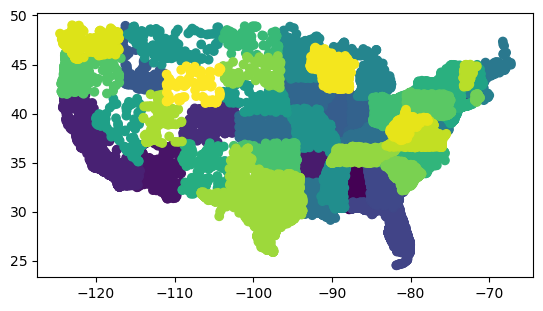

In [27]:
geo_data.plot(geo_data['STATE'])



In [26]:
geo_data

,STATE,STATENAME,ST_CASE,COUNTY,COUNTYNAME,CITY,CITYNAME,MONTH,DAY,DAYNAME,DAY_WEEK,HOUR,LATITUDE,LONGITUD,LGT_COND,WEATHER,geometry
0,1,Alabama,10001,115,ST. CLAIR (115),0,NOT APPLICABLE,2,12,12,6,22,33.601642,-86.312383,2,2,POINT (-86.31238 33.60164)
1,1,Alabama,10002,73,JEFFERSON (73),0,NOT APPLICABLE,2,11,11,5,18,33.541361,-86.643744,2,2,POINT (-86.64374 33.54136)
2,1,Alabama,10003,73,JEFFERSON (73),0,NOT APPLICABLE,2,7,7,1,0,33.419797,-86.752572,2,2,POINT (-86.75257 33.41980)
3,1,Alabama,10004,117,SHELBY (117),0,NOT APPLICABLE,2,3,3,4,16,33.360894,-86.777139,1,1,POINT (-86.77714 33.36089)
4,1,Alabama,10005,73,JEFFERSON (73),0,NOT APPLICABLE,1,30,30,7,22,33.815208,-86.825342,2,10,POINT (-86.82534 33.81521)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503,56,Wyoming,560100,19,JOHNSON (19),0,NOT APPLICABLE,11,27,27,7,9,44.183594,-106.622031,1,1,POINT (-106.62203 44.18359)
39504,56,Wyoming,560101,3,BIG HORN (3),0,NOT APPLICABLE,12,14,14,3,18,44.257797,-107.856219,2,1,POINT (-107.85622 44.25780)
39505,56,Wyoming,560102,37,SWEETWATER (37),0,NOT APPLICABLE,12,15,15,4,10,41.560719,-109.536278,1,1,POINT (-109.53628 41.56072)
39506,56,Wyoming,560103,21,LARAMIE (21),100,CHEYENNE,12,19,19,1,17,41.138878,-104.766653,2,1,POINT (-104.76665 41.13888)
